# Cotton Plant Disease with Transfer Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
Aphids = glob("Aphids edited/*.jpg")
Army_worm = glob("Army worm edited/*.jpg")
Bacterial_Blight = glob("Bacterial Blight edited/*.jpg")
Healthy_leaf = glob("Healthy leaf edited/*.jpg")
Powdery_Mildew = glob("Powdery Mildew Edited/*.jpg")
Target_spot = glob("Target spot edited/*.jpg")

In [17]:
classes = {0: 'Aphids', 1: 'Army_worm', 2: 'Bacterial_Blight', 3: 'Healthy_leaf', 4: 'Powdery_Mildew',5 :'Target_spot'}

In [18]:
images = []
labels = []

for i in Aphids:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in Army_worm:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in Bacterial_Blight:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in Healthy_leaf:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

for i in Powdery_Mildew:
    img = plt.imread(i)
    images.append(img)
    labels.append(4)
    
for i in Target_spot:
    img = plt.imread(i)
    images.append(img)
    labels.append(5)

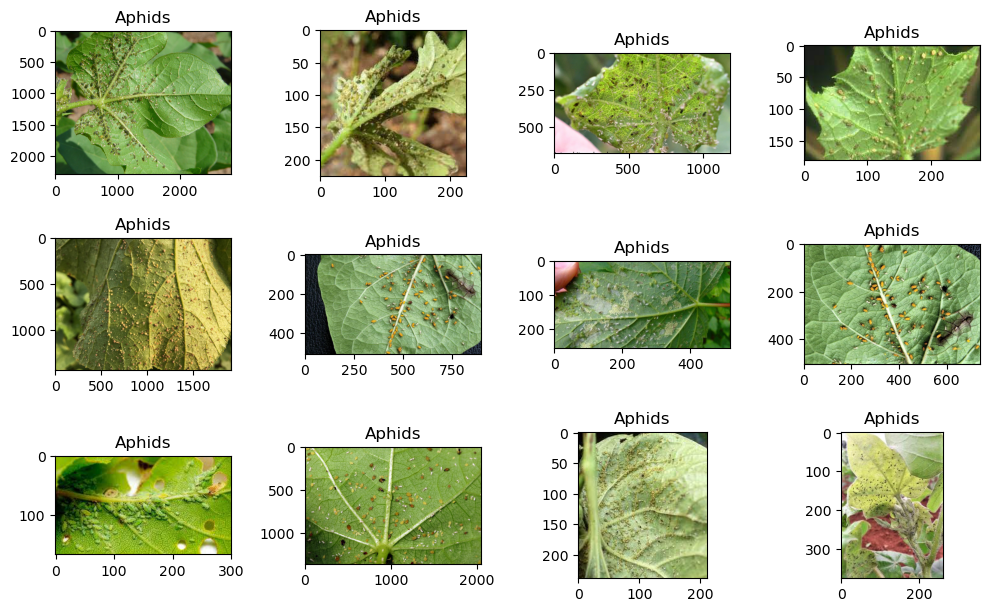

In [19]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [20]:
images,labels = shuffle(images,labels)

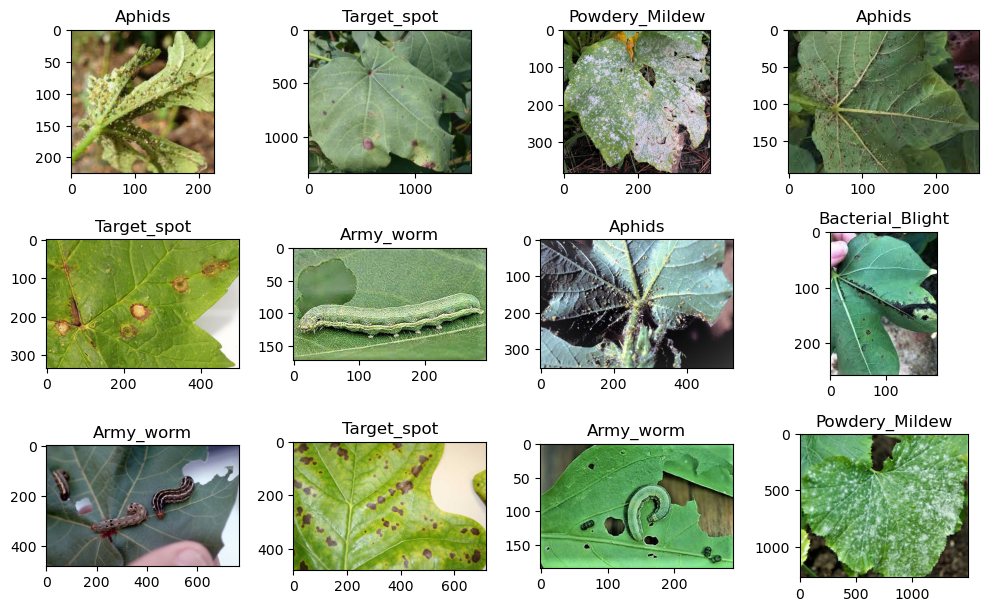

In [21]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [22]:
X = []

for i in images:
    X.append(resize(i, (224,224,3)))

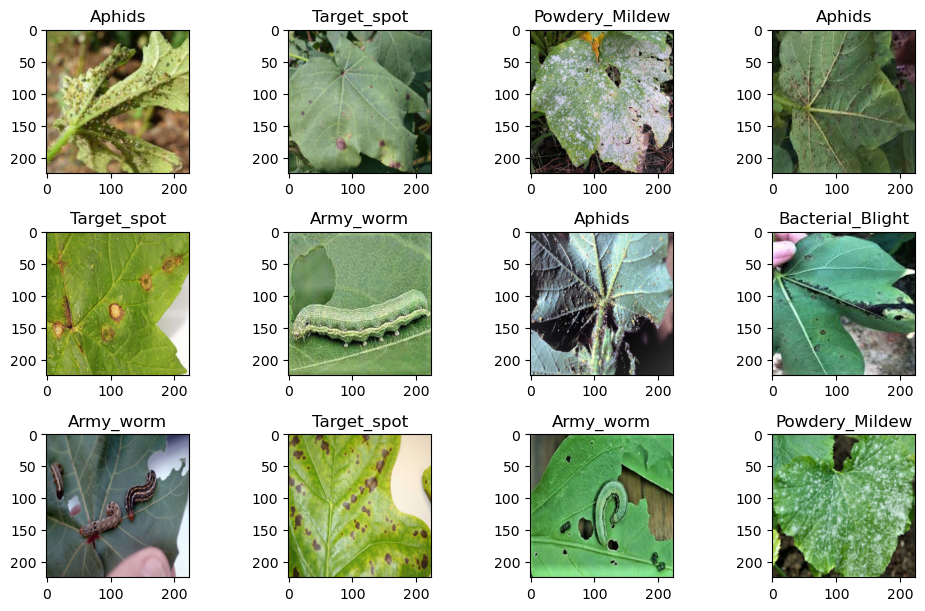

In [23]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [24]:
X = np.array(X)
y = np.array(labels)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [26]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [27]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1d871afbe10>

In [28]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [29]:
model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(6, activation = 'softmax')
])

In [30]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [31]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
6/6 [==============================] - 12s 1s/step - loss: 1.8570 - accuracy: 0.2203 - val_loss: 1.6034 - val_accuracy: 0.4000
Epoch 2/10
6/6 [==============================] - 6s 1s/step - loss: 1.3916 - accuracy: 0.5254 - val_loss: 1.1682 - val_accuracy: 0.6000
Epoch 3/10
6/6 [==============================] - 6s 1s/step - loss: 0.9742 - accuracy: 0.7119 - val_loss: 0.9110 - val_accuracy: 0.8000
Epoch 4/10
6/6 [==============================] - 6s 991ms/step - loss: 0.6681 - accuracy: 0.8418 - val_loss: 0.6604 - val_accuracy: 0.8000
Epoch 5/10
6/6 [==============================] - 6s 1s/step - loss: 0.5154 - accuracy: 0.8757 - val_loss: 0.7210 - val_accuracy: 0.7000
Epoch 6/10
6/6 [==============================] - 6s 1s/step - loss: 0.3666 - accuracy: 0.9040 - val_loss: 0.3459 - val_accuracy: 0.9000
Epoch 7/10
6/6 [==============================] - 6s 1s/step - loss: 0.2855 - accuracy: 0.9322 - val_loss: 0.5015 - val_accuracy: 0.8000
Epoch 8/10
6/6 [=====================

In [32]:
y_pred = model.predict(X_test)

2/2 [==============================] - 2s 470ms/step


In [33]:
y_pred = [np.argmax(i) for i in y_pred]

In [34]:
accuracy_score(y_test,y_pred)

0.8297872340425532

<Axes: >

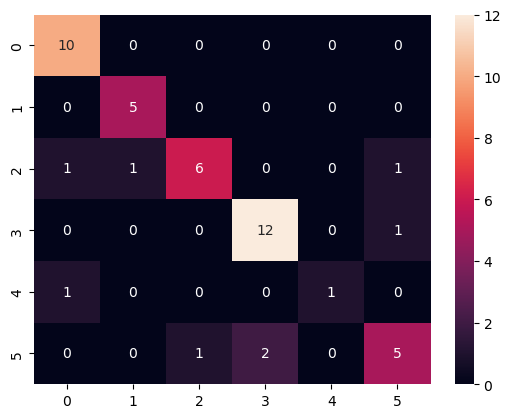

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.83      1.00      0.91         5
           2       0.86      0.67      0.75         9
           3       0.86      0.92      0.89        13
           4       1.00      0.50      0.67         2
           5       0.71      0.62      0.67         8

    accuracy                           0.83        47
   macro avg       0.85      0.79      0.80        47
weighted avg       0.83      0.83      0.82        47

